In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
 
import plotly.plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
init_notebook_mode(connected=True)

cf.go_offline()
print(__version__) # requires version >= 1.9.0

In [2]:
np.random.seed(111)
fd = pd.read_csv("fueldata.csv",sep=";", error_bad_lines=False)

In [3]:
fd.head()

,YR,BRAND,MODEL,CLASS,ENG,CYLINDERS,TRANS,FUEL,CITY_L,HWY_L,CITY_MI,HWY_MI,FUEL_L_YR,CO2
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.6,5.6,33,50,1440,166
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.8,6.5,29,43,1660,191
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.0,4.8,56,59,980,113
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.2,7.7,25,37,1920,221
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.7,7.3,26,39,1840,212


In [4]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 14 columns):
YR           1061 non-null int64
BRAND        1061 non-null object
MODEL        1061 non-null object
CLASS        1061 non-null object
ENG          1061 non-null float64
CYLINDERS    1061 non-null int64
TRANS        1061 non-null object
FUEL         1061 non-null object
CITY_L       1061 non-null float64
HWY_L        1061 non-null float64
CITY_MI      1061 non-null int64
HWY_MI       1061 non-null int64
FUEL_L_YR    1061 non-null int64
CO2          1061 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 116.1+ KB


In [5]:
#sns.pairplot(fd,hue='FUEL_L_YR',palette='Set1')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = fd.drop(['FUEL_L_YR','BRAND','MODEL','CLASS','ENG','TRANS','FUEL','CITY_L','HWY_L'],axis=1)
y = fd['FUEL_L_YR']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
predictions = dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
#print(classification_report(y_test,predictions))

In [14]:
fd.describe()

,YR,ENG,CYLINDERS,CITY_L,HWY_L,CITY_MI,HWY_MI,FUEL_L_YR,CO2
count,1061.0,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.00000
mean,2014.0,3.356173,5.801131,11.809708,8.000848,26.499529,38.211122,2018.982092,226.02639
std,0.0,1.415784,1.799119,3.863031,2.446520,8.917084,10.275301,640.365241,112.58635
min,2014.0,1.000000,3.000000,3.600000,4.000000,10.000000,16.000000,760.000000,87.00000
25%,2014.0,2.000000,4.000000,9.000000,6.300000,20.000000,31.000000,1560.000000,179.00000
50%,2014.0,3.400000,6.000000,11.100000,7.400000,25.000000,38.000000,1900.000000,218.00000
75%,2014.0,4.300000,8.000000,13.900000,9.200000,31.000000,45.000000,2340.000000,258.00000
max,2014.0,8.400000,12.000000,27.700000,17.600000,78.000000,71.000000,4620.000000,3358.00000


In [15]:
print(confusion_matrix(y_test,predictions))

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 1]]


In [16]:
fd['YR'].value_counts()

2014    1061
Name: YR, dtype: int64

In [17]:
fd.head(5)

,YR,BRAND,MODEL,CLASS,ENG,CYLINDERS,TRANS,FUEL,CITY_L,HWY_L,CITY_MI,HWY_MI,FUEL_L_YR,CO2
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.6,5.6,33,50,1440,166
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.8,6.5,29,43,1660,191
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.0,4.8,56,59,980,113
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.2,7.7,25,37,1920,221
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.7,7.3,26,39,1840,212


In [18]:
fd['CYLINDERS'].value_counts()

4     416
6     354
8     252
12     17
10      9
5       9
3       4
Name: CYLINDERS, dtype: int64

In [19]:
fd['FUEL'].value_counts()

X    508
Z    436
E     92
D     25
Name: FUEL, dtype: int64

In [20]:
fd['TRANS'].value_counts()

A6     222
AS6    189
M6     141
A8      85
AS8     82
AS7     77
M5      48
AV      46
A4      45
AM7     34
A5      30
A7      12
AS5     10
M7       9
A9       8
AV6      7
AM6      6
AV7      4
AM5      2
AS9      2
AV8      1
AS4      1
Name: TRANS, dtype: int64

In [21]:
fd['BRAND'].value_counts()

FORD             88
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
AUDI             49
TOYOTA           49
GMC              49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
KIA              33
NISSAN           33
CADILLAC         32
JEEP             31
MAZDA            27
SUBARU           23
LEXUS            22
JAGUAR           22
HYUNDAI          22
HONDA            21
INFINITI         21
LAND ROVER       19
CHRYSLER         19
MITSUBISHI       16
BUICK            16
ACURA            12
RAM              11
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ASTON MARTIN      7
ROLLS-ROYCE       7
MASERATI          6
LAMBORGHINI       3
SRT               2
SMART             2
Name: BRAND, dtype: int64

In [22]:
X = fd.drop(['FUEL_L_YR','BRAND','MODEL','CLASS','ENG','TRANS','FUEL'],axis=1)
y = fd['FUEL_L_YR']

In [23]:
#

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
dtree = DecisionTreeClassifier()

In [25]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
predictions = dtree.predict(X_test)

In [27]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        760       0.67      1.00      0.80         2
        800       0.00      0.00      0.00         1
        840       0.00      0.00      0.00         0
        880       0.00      0.00      0.00         1
        920       0.00      0.00      0.00         1
        940       0.00      0.00      0.00         0
        960       0.00      0.00      0.00         1
       1020       0.00      0.00      0.00         0
       1040       0.00      0.00      0.00         1
       1060       1.00      1.00      1.00         1
       1120       1.00      1.00      1.00         1
       1140       0.00      0.00      0.00         0
       1160       1.00      0.67      0.80         3
       1180       1.00      1.00      1.00         1
       1200       1.00      1.00      1.00         3
       1220       1.00      1.00      1.00         3
       1240       1.00      1.00      1.00         1
       1260       0.00      0.00      0.00   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [28]:
print(confusion_matrix(y_test,predictions))

[[2 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


In [29]:
fd1 = fd.drop(['YR','CO2','BRAND'],axis=1)

In [30]:
fd1.head(5)

,MODEL,CLASS,ENG,CYLINDERS,TRANS,FUEL,CITY_L,HWY_L,CITY_MI,HWY_MI,FUEL_L_YR
0,ILX,COMPACT,2.0,4,AS5,Z,8.6,5.6,33,50,1440
1,ILX,COMPACT,2.4,4,M6,Z,9.8,6.5,29,43,1660
2,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.0,4.8,56,59,980
3,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.2,7.7,25,37,1920
4,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.7,7.3,26,39,1840


In [31]:
#t = np.floor(fd1['FUEL_L_YR']/1000)

In [32]:
fd1['FUEL_L_YR'] = fd1['FUEL_L_YR'].apply(lambda x:x/1000).astype(np.int64)

In [33]:
fd1.head()

,MODEL,CLASS,ENG,CYLINDERS,TRANS,FUEL,CITY_L,HWY_L,CITY_MI,HWY_MI,FUEL_L_YR
0,ILX,COMPACT,2.0,4,AS5,Z,8.6,5.6,33,50,1
1,ILX,COMPACT,2.4,4,M6,Z,9.8,6.5,29,43,1
2,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.0,4.8,56,59,0
3,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.2,7.7,25,37,1
4,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.7,7.3,26,39,1


In [34]:
fd1['CLASS'] = fd1['CLASS'].apply(lambda x: x.replace('-','').replace(' ',''))

In [35]:
fd1.head(5)

,MODEL,CLASS,ENG,CYLINDERS,TRANS,FUEL,CITY_L,HWY_L,CITY_MI,HWY_MI,FUEL_L_YR
0,ILX,COMPACT,2.0,4,AS5,Z,8.6,5.6,33,50,1
1,ILX,COMPACT,2.4,4,M6,Z,9.8,6.5,29,43,1
2,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.0,4.8,56,59,0
3,MDX 4WD,SUVSMALL,3.5,6,AS6,Z,11.2,7.7,25,37,1
4,RDX AWD,SUVSMALL,3.5,6,AS6,Z,10.7,7.3,26,39,1


In [36]:
fd1['TRANS_NO'] = fd1['TRANS'].apply(lambda x: x[-1] if(x[-1].isdigit()) else 0).astype(np.int64)

In [37]:
fd1['MODEL'] = fd1['MODEL'].apply(lambda x: x.replace(' ',''))

In [38]:
#fd1.drop(['TRANS'],axis=1,inplace=True)

In [39]:
fd1.head()

,MODEL,CLASS,ENG,CYLINDERS,TRANS,FUEL,CITY_L,HWY_L,CITY_MI,HWY_MI,FUEL_L_YR,TRANS_NO
0,ILX,COMPACT,2.0,4,AS5,Z,8.6,5.6,33,50,1,5
1,ILX,COMPACT,2.4,4,M6,Z,9.8,6.5,29,43,1,6
2,ILXHYBRID,COMPACT,1.5,4,AV7,Z,5.0,4.8,56,59,0,7
3,MDX4WD,SUVSMALL,3.5,6,AS6,Z,11.2,7.7,25,37,1,6
4,RDXAWD,SUVSMALL,3.5,6,AS6,Z,10.7,7.3,26,39,1,6


In [40]:
fd1['FUEL'].value_counts()

X    508
Z    436
E     92
D     25
Name: FUEL, dtype: int64

In [41]:
def mapping(x):
    if(x=='X'):
        return 1
    elif(x=='Z'):
        return 2
    elif(x=='E'):
        return 3 
    else:
        return 4

In [42]:
fd1['FUEL_MAP'] = fd1['FUEL'].apply(lambda x: mapping(x))

In [43]:
fd1.head()

,MODEL,CLASS,ENG,CYLINDERS,TRANS,FUEL,CITY_L,HWY_L,CITY_MI,HWY_MI,FUEL_L_YR,TRANS_NO,FUEL_MAP
0,ILX,COMPACT,2.0,4,AS5,Z,8.6,5.6,33,50,1,5,2
1,ILX,COMPACT,2.4,4,M6,Z,9.8,6.5,29,43,1,6,2
2,ILXHYBRID,COMPACT,1.5,4,AV7,Z,5.0,4.8,56,59,0,7,2
3,MDX4WD,SUVSMALL,3.5,6,AS6,Z,11.2,7.7,25,37,1,6,2
4,RDXAWD,SUVSMALL,3.5,6,AS6,Z,10.7,7.3,26,39,1,6,2


In [44]:
def mapping_AM_to_num(x):
    if(x[0]=='A'):
        return 1
    else:
        return 2

In [45]:
fd1['TRANS_AM'] = fd1['TRANS'].apply(lambda x: mapping_AM_to_num(x))

In [46]:
from sklearn import preprocessing
pl = preprocessing.LabelEncoder()

In [47]:
fd1['CLASS'] = pl.fit_transform(fd1['CLASS'])

In [48]:
fd1['CLASS'].value_counts()

2     184
0     169
10    154
11    112
1      82
12     71
9      64
6      60
3      47
8      36
14     26
13     26
5      12
4      12
7       6
Name: CLASS, dtype: int64

In [49]:
X = fd1.drop(['MODEL','TRANS','FUEL','FUEL_L_YR'],axis=1)
y = fd1['FUEL_L_YR']

In [50]:
X.head()

,CLASS,ENG,CYLINDERS,CITY_L,HWY_L,CITY_MI,HWY_MI,TRANS_NO,FUEL_MAP,TRANS_AM
0,0,2.0,4,8.6,5.6,33,50,5,2,1
1,0,2.4,4,9.8,6.5,29,43,6,2,2
2,0,1.5,4,5.0,4.8,56,59,7,2,1
3,10,3.5,6,11.2,7.7,25,37,6,2,1
4,10,3.5,6,10.7,7.3,26,39,6,2,1


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)
dtree = DecisionTreeClassifier()

In [52]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
predictions = dtree.predict(X_test)

In [54]:
print(confusion_matrix(y_test,predictions))

[[  5   1   0   0   0]
 [  0 176   5   0   0]
 [  0   0 108   0   0]
 [  0   0   1  20   0]
 [  0   0   0   0   3]]


In [55]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      0.83      0.91         6
          1       0.99      0.97      0.98       181
          2       0.95      1.00      0.97       108
          3       1.00      0.95      0.98        21
          4       1.00      1.00      1.00         3

avg / total       0.98      0.98      0.98       319



In [56]:
#X = fd1.drop(['MODEL','TRANS','FUEL','FUEL_L_YR','CITY_L','HWY_L','CITY_MI','HWY_MI'],axis=1)
X = fd1.drop(['MODEL','TRANS','FUEL','FUEL_L_YR'],axis=1)
y = fd1['FUEL_L_YR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[  5   0   0   0   0]
 [  1 172   0   0   0]
 [  0   1 118   0   0]
 [  0   0   1  17   0]
 [  0   0   0   0   4]]


             precision    recall  f1-score   support

          0       0.83      1.00      0.91         5
          1       0.99      0.99      0.99       173
          2       0.99      0.99      0.99       119
          3       1.00      0.94      0.97        18
          4       1.00      1.00      1.00         4

avg / total       0.99      0.99      0.99       319



In [57]:
fd1['CLASS'].value_counts()

2     184
0     169
10    154
11    112
1      82
12     71
9      64
6      60
3      47
8      36
14     26
13     26
5      12
4      12
7       6
Name: CLASS, dtype: int64

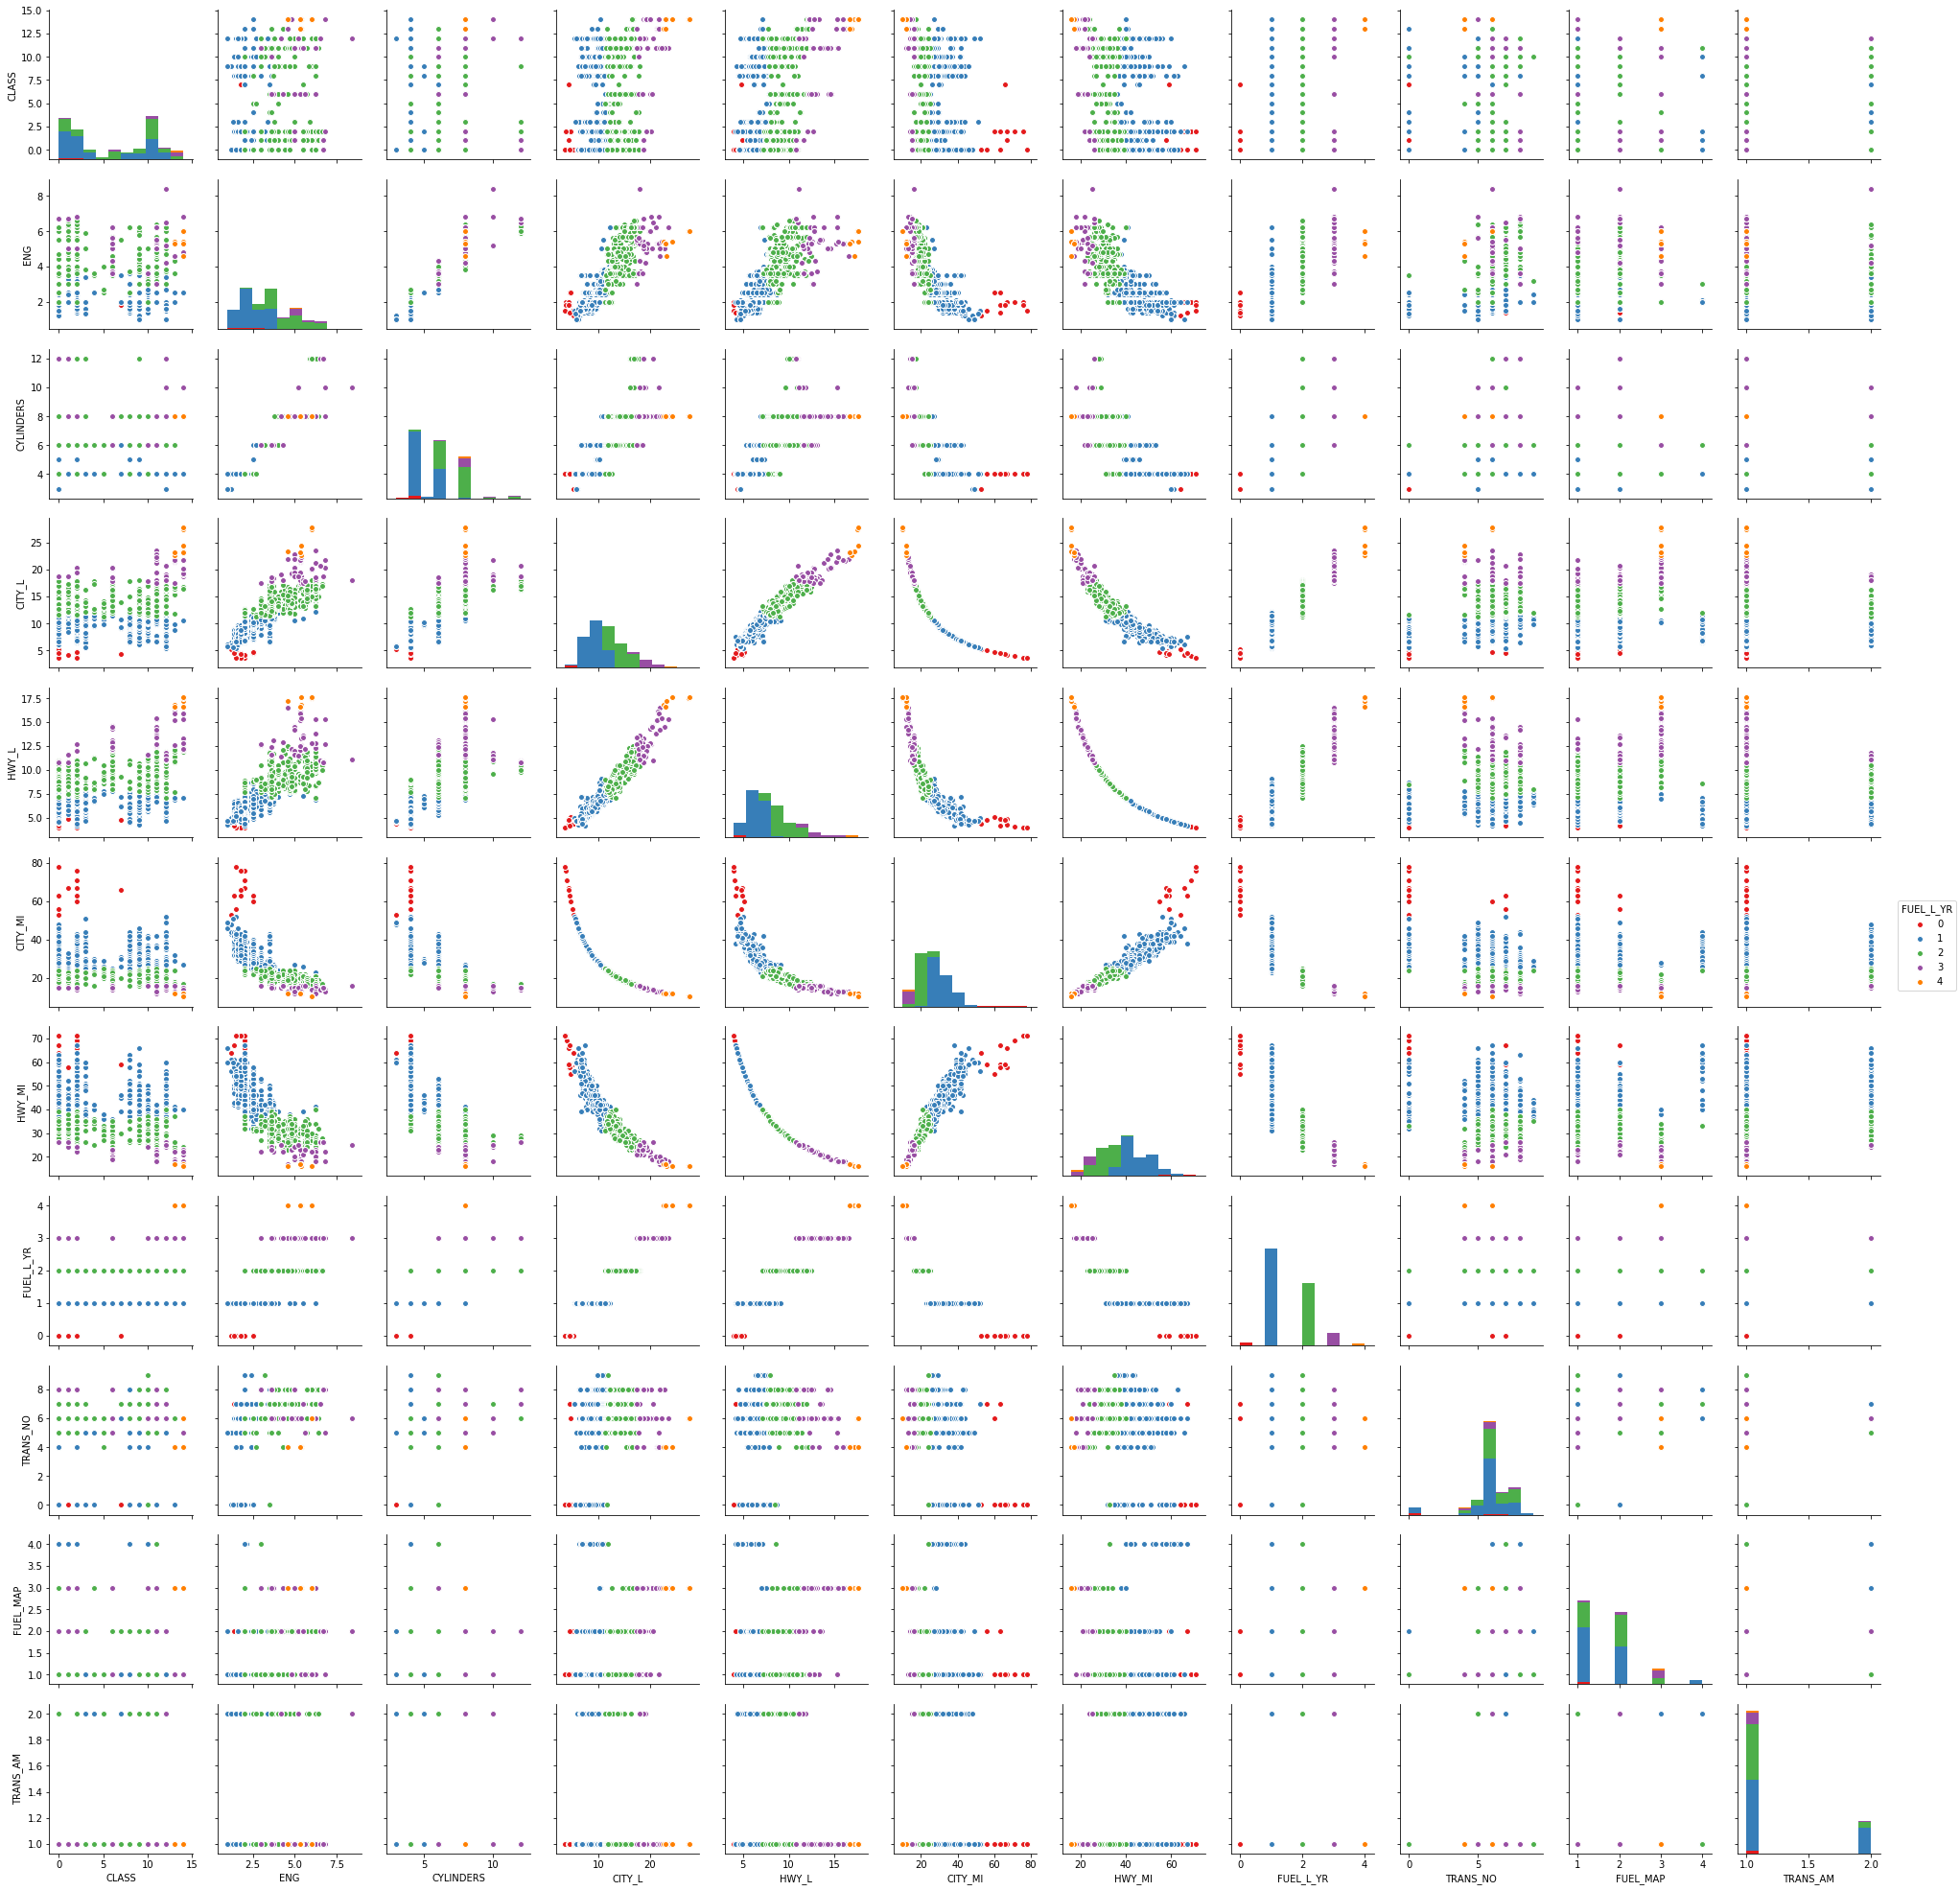

In [58]:
sns.pairplot(fd1.drop(['MODEL','TRANS','FUEL'],axis=1),hue='FUEL_L_YR',palette='Set1')

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 10 columns):
CLASS        1061 non-null int64
ENG          1061 non-null float64
CYLINDERS    1061 non-null int64
CITY_L       1061 non-null float64
HWY_L        1061 non-null float64
CITY_MI      1061 non-null int64
HWY_MI       1061 non-null int64
TRANS_NO     1061 non-null int64
FUEL_MAP     1061 non-null int64
TRANS_AM     1061 non-null int64
dtypes: float64(3), int64(7)
memory usage: 83.0 KB


In [60]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(dtree, X_train, y_train, cv=5, scoring='accuracy')
print(scores.mean())

0.9757467604590893


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [61]:
from sklearn.preprocessing import label_binarize
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4])
n_classes = y.shape[1]

In [62]:
y.shape

(1061, 5)

In [63]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)
# Learn to predict each class against the other
#classifier = DecisionTreeClassifier(svm.SVC(kernel='linear', probability=True,
#                                 random_state=random_state))
#y_score = classifier.fit(X_train, y_train).decision_function(X_test)
dtree = DecisionTreeClassifier(max_depth=8)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [64]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [65]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [66]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [67]:
from scipy import interp
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [68]:
# Finally average it and compute AUC
mean_tpr /= n_classes


In [69]:
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

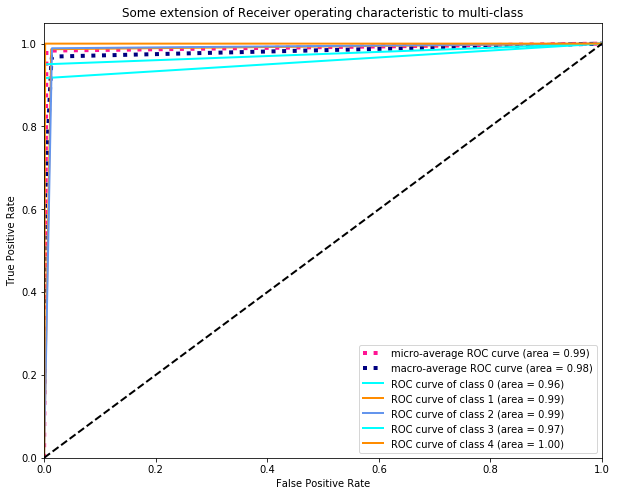

In [70]:
from itertools import cycle
lw = 2
# Plot all ROC curves
plt.figure(figsize=(10,8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.axis([4, 8, 8, 20])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



In [86]:
# from IPython.display import Image
# from sklearn.externals.six import StringIO
# from sklearn.tree import export_graphviz
# import pydot

# #X = fd1.drop(['MODEL','TRANS','FUEL','FUEL_L_YR'],axis=1)
# #y = fd1['FUEL_L_YR']
# features = list(X.columns[0:])
# features
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X.columns[0:])
features

['CLASS',
 'ENG',
 'CYLINDERS',
 'CITY_L',
 'HWY_L',
 'CITY_MI',
 'HWY_MI',
 'TRANS_NO',
 'FUEL_MAP',
 'TRANS_AM']

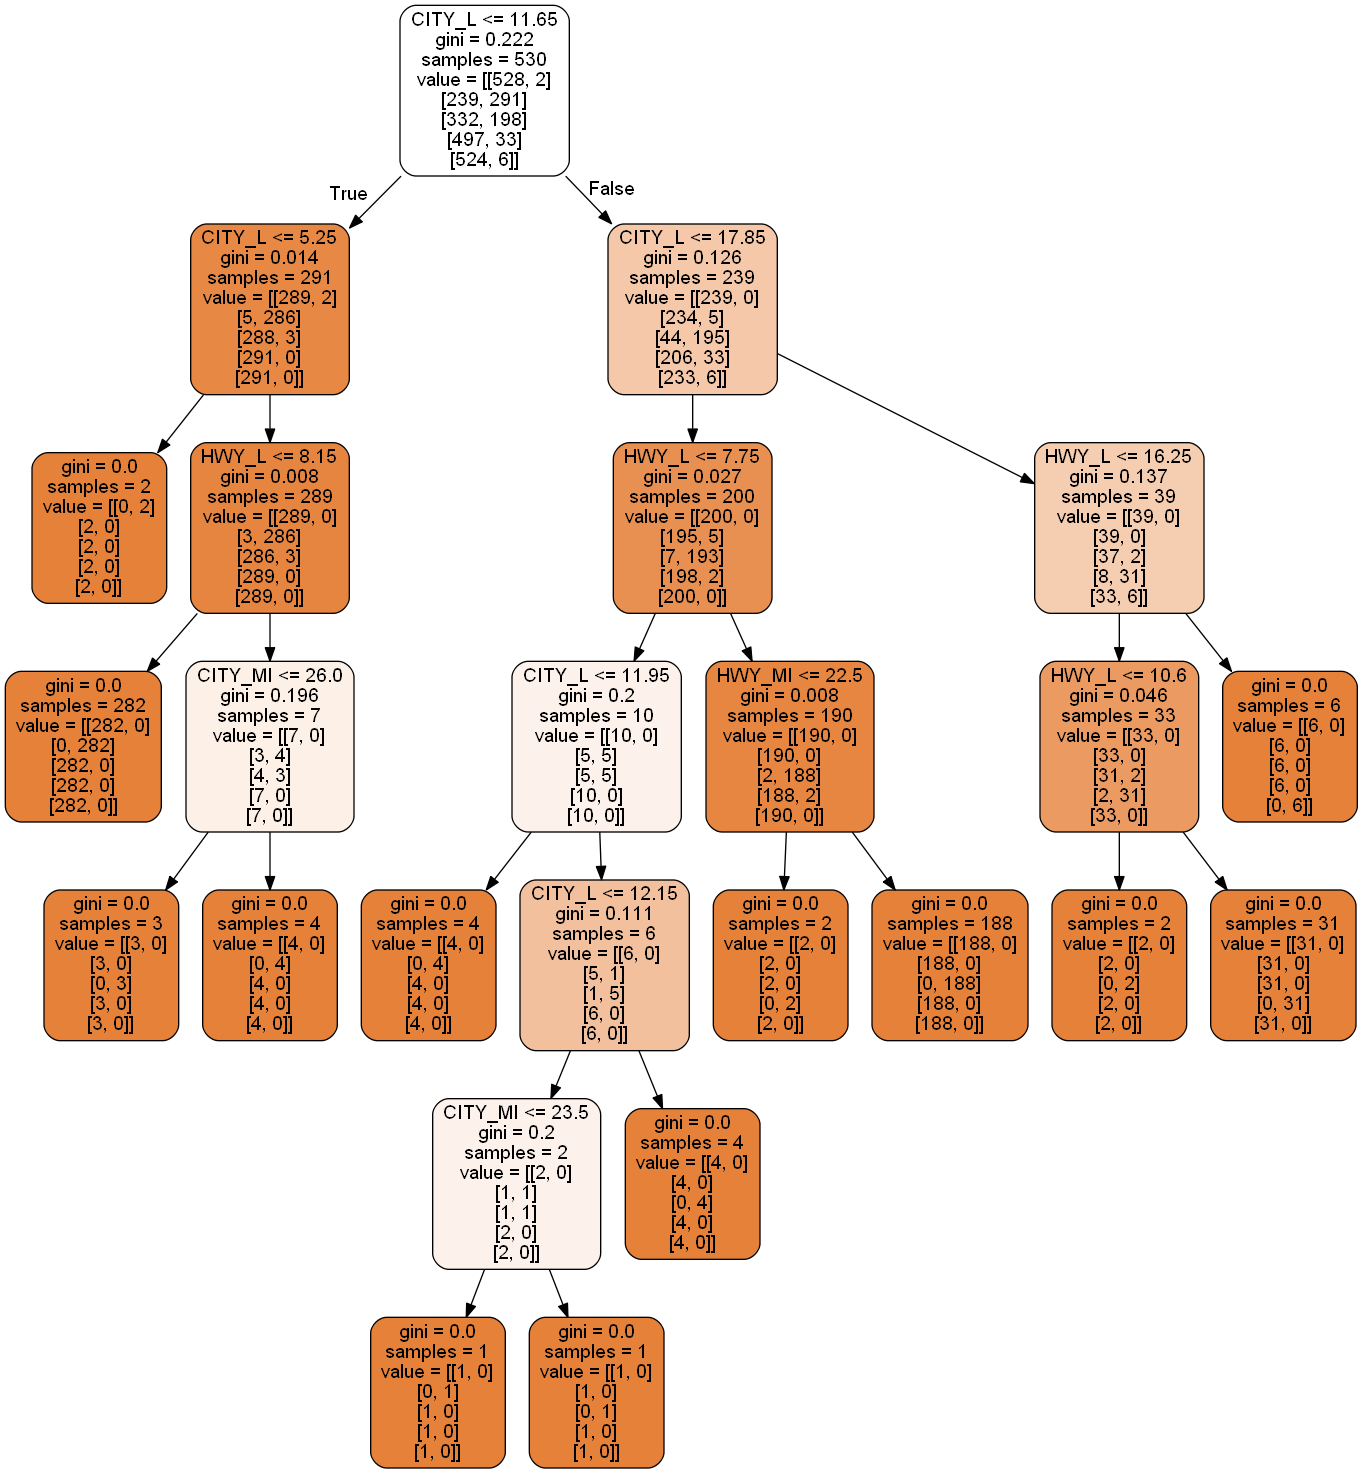

In [88]:
# dot_data = StringIO()  
# export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
# graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
# Image(graph[0].create_png())
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
X = fd1.drop(['MODEL','TRANS','FUEL','FUEL_L_YR'],axis=1)
y = fd1['FUEL_L_YR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)
rfc.fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

In [ ]:
print(classification_report(y_test,rfc_pred))

# SVM

In [ ]:
from sklearn.svm import SVC
model = SVC()
X = fd1.drop(['MODEL','TRANS','FUEL','FUEL_L_YR'],axis=1)
y = fd1['FUEL_L_YR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)
model.fit(X_train,y_train)

In [ ]:
fd1.head()

In [ ]:
prediction_svm = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,prediction_svm))

In [ ]:
print(classification_report(y_test,prediction_svm))